In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import Tracking_Py

# Tracking with whole image. 
Cutting the aggregates out from the whole image and do pseudo tracking.

In [2]:
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/U_avg.h5", "r") as file:
    U = file["matrix"][:]
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/V_avg.h5", "r") as file:
    V = file["matrix"][:]

with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/M_avg.h5", "r") as file:
    M = file["matrix"][:]
    
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/xgrid_matrix", "r") as file:
    xgrid = file["matrix"][:]
    
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/ygrid_matrix", "r") as file:
    ygrid = file["matrix"][:]

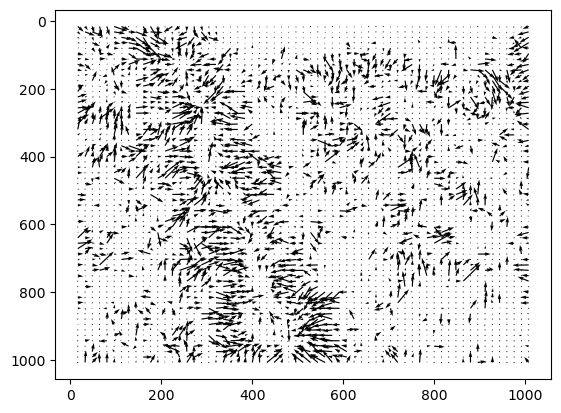

In [3]:
plt.quiver(xgrid[0], ygrid[0], V[0], -U[0])
plt.gca().invert_yaxis()

### Extract aggregates

In [11]:
t = 100

agg1_xgrid = xgrid[0][7:34, 12:39]
agg1_ygrid = ygrid[0][7:34, 12:39]
agg1_U = U[t][7:34, 12:39]
agg1_V = V[t][7:34, 12:39]
agg1_M = M[t][7:34, 12:39]

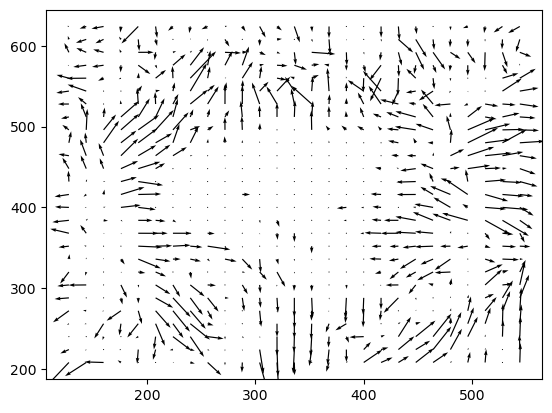

In [14]:
plt.quiver(agg1_xgrid, agg1_ygrid, agg1_V, -agg1_U)

In [19]:
# Iteration over time to generate the aggregate vectorfield.
agg1_U = []
agg1_V = []
agg1_M = []

for t in range(np.shape(U)[0]): 
    agg1_U.append(U[t][7:34, 12:39])
    agg1_V.append(V[t][7:34, 12:39])
    agg1_M.append(M[t][7:34, 12:39])

agg1_U = np.array(agg1_U)
agg1_V = np.array(agg1_V)
agg1_M = np.array(agg1_M)

In [44]:
# Giving start points, time intervals.


agg1_pseudo_x, agg1_pseudo_y = Tracking_Py.pseudo_tracking_piv_grid_single_v2(agg1_U,
                                                                             agg1_V, 
                                                                             [0, 50],
                                                                             [200],
                                                                             [400])
# TODO: adapt the aggregate coordinate!

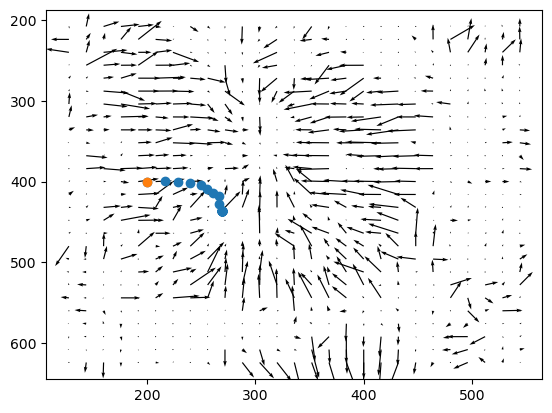

In [52]:
plt.quiver(agg1_xgrid, agg1_ygrid, agg1_V[50], -agg1_U[50])
plt.scatter(agg1_pseudo_x, agg1_pseudo_y)
plt.scatter([200], [400])
# plt.xlim(100,600)
# plt.ylim(100,600)
plt.gca().invert_yaxis()

In [38]:
27*16

432